### Assignment 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir('/Users/davidemartinelli/Desktop/Bocconi/DSBA/Statistics/ProbabilityAndStatistics-master-2/Assignment_2')
import seaborn as sns
sns.set()

We remove the last column of the matrix (Customer_Segment) because it is what we are trying to estimate, so it should note be included

In [2]:
df = pd.read_csv('wines_properties.csv')
df = df.iloc[:,:-1] # -> all columns but Customer_Segment

In [3]:
df.describe() # -> no NaNs

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


### PCA

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
x = StandardScaler().fit_transform(df)
pca = PCA(n_components=2)
new_x = pca.fit_transform(x)
new_x

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

### Circle of Correlations

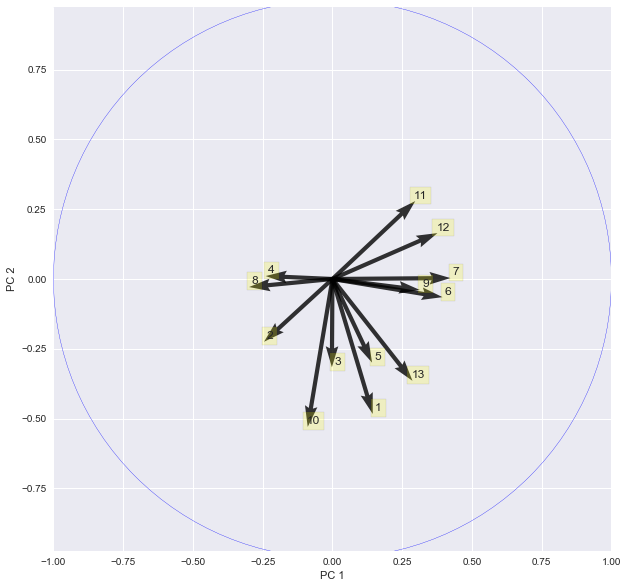

In [7]:
PCs = pca.components_

fig = plt.figure(figsize=(10,10))
plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]), 
           PCs[0,:], PCs[1,:], 
           angles='xy', scale_units='xy', scale=1, alpha=0.8)

feature_names = np.arange(PCs.shape[1]) + 1 # here we added '+1' so that first component is number 1 (and not 0)
for i,j,z in zip(PCs[1,:]+0.02, PCs[0,:]+0.02, feature_names): 
    plt.text(j, i, z, ha='center', va='center', size=12,
            bbox=dict(facecolor='yellow', alpha=0.2)) 

circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b') 
plt.gca().add_artist(circle) 

plt.axis('equal')
plt.xlim([-1.0,1.0])
plt.ylim([-1.0,1.0])

plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.show()

### Cirle of correlations interpretation

In order to decide whether to consider a certain variable for interpretation of a Principal Component, we set the threshold of correlation between the variable and the PC to 0.4.

By looking at the circle of correlations above we can say the following:
The Principal Component 1 is positively correlated at a level higher than our threshold with the variables 7 (flavanoids), 6 (total_phenols), 12 (OD280) and negatively correlated at a level higher than our threshold with no variable.

Similarly, considering our threshold of interpretability, the Principal Component 2 is positively correlated with no variable and negatively correlated with the variables 13 (Proline), 10 (Color_intensity), 1 (alcohol).

PC1 may be interpreted as the Principal Component indicating/summarizing the organoleptic properties of the wine, in particular related to the presence of flavanoids, total phenols and OD280.

PC2 may be interpreted as being negatively correlated with the strenght of taste and colour of the wine. Therefore PC2 may be interpreted as summarizing/being an indicator of overall strenght of taste and colour of the wine (where higher values of PC2 indicate lighter taste and color while lower values of PC2 indicate stronger taste and color).


### Hierarchical Clustering

In [8]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(x, metric='euclidean')))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,0.000000,3.497535,3.026608,2.842505,3.566854,2.525290,2.553232,2.407784,2.964349,2.548898,...,6.048926,6.621593,7.034650,7.609047,6.360783,7.226417,6.296513,6.490941,6.078781,7.184421
1,3.497535,0.000000,4.142912,4.360615,4.627470,3.391756,2.665379,3.324407,2.692454,2.501210,...,6.346339,6.921394,5.678651,6.434187,5.971547,6.712249,6.108393,6.396900,6.094927,7.367719
2,3.026608,4.142912,0.000000,3.246486,2.981107,2.867788,2.840197,3.471078,3.561492,2.938668,...,5.269699,5.918033,6.489050,7.067099,5.879301,6.545884,5.464904,6.253677,5.851793,6.353885
3,2.842505,4.360615,3.246486,0.000000,4.495957,1.905071,3.161292,3.351492,3.469290,2.723190,...,6.484274,6.832323,7.842215,7.991604,6.597224,7.501526,6.647583,6.888855,6.626637,7.275197
4,3.566854,4.627470,2.981107,4.495957,0.000000,3.889157,3.984090,2.975026,4.438478,4.045985,...,4.249202,4.493669,5.409523,6.255262,5.220928,5.600390,4.439880,5.492767,4.949588,5.135209
5,2.525290,3.391756,2.867788,1.905071,3.889157,0.000000,2.347295,2.616411,2.435839,2.394774,...,5.875301,6.564426,6.953878,7.208607,5.907465,6.813117,5.954627,6.250460,5.817361,6.761643
6,2.553232,2.665379,2.840197,3.161292,3.984090,2.347295,0.000000,2.484116,1.901428,2.018294,...,5.537068,6.367139,6.226639,6.668323,5.383362,6.342854,5.636165,6.224682,5.827336,6.534668
7,2.407784,3.324407,3.471078,3.351492,2.975026,2.616411,2.484116,0.000000,3.377188,2.989914,...,5.118520,5.512092,5.992421,6.687761,5.541889,6.153403,5.307447,5.761403,5.370791,6.248510
8,2.964349,2.692454,3.561492,3.469290,4.438478,2.435839,1.901428,3.377188,0.000000,2.078562,...,5.863832,6.745060,6.407926,6.707190,5.437169,6.554463,5.800050,6.316188,5.970151,6.709953
9,2.548898,2.501210,2.938668,2.723190,4.045985,2.394774,2.018294,2.989914,2.078562,0.000000,...,5.660010,6.370180,6.311121,6.532799,5.523149,6.782001,5.844873,6.274939,5.935317,6.762193


In [9]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

/Users/davidemartinelli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,15.0,53.0,3.077600,2.0
cluster 2,9.0,47.0,3.442136,2.0
cluster 3,140.0,162.0,3.684487,2.0
cluster 4,164.0,167.0,3.774003,2.0
cluster 5,131.0,133.0,4.048145,2.0
cluster 6,111.0,125.0,4.122600,2.0
cluster 7,63.0,98.0,4.161390,2.0
cluster 8,11.0,12.0,4.170347,2.0
cluster 9,155.0,173.0,4.277179,2.0
cluster 10,145.0,163.0,4.411778,2.0


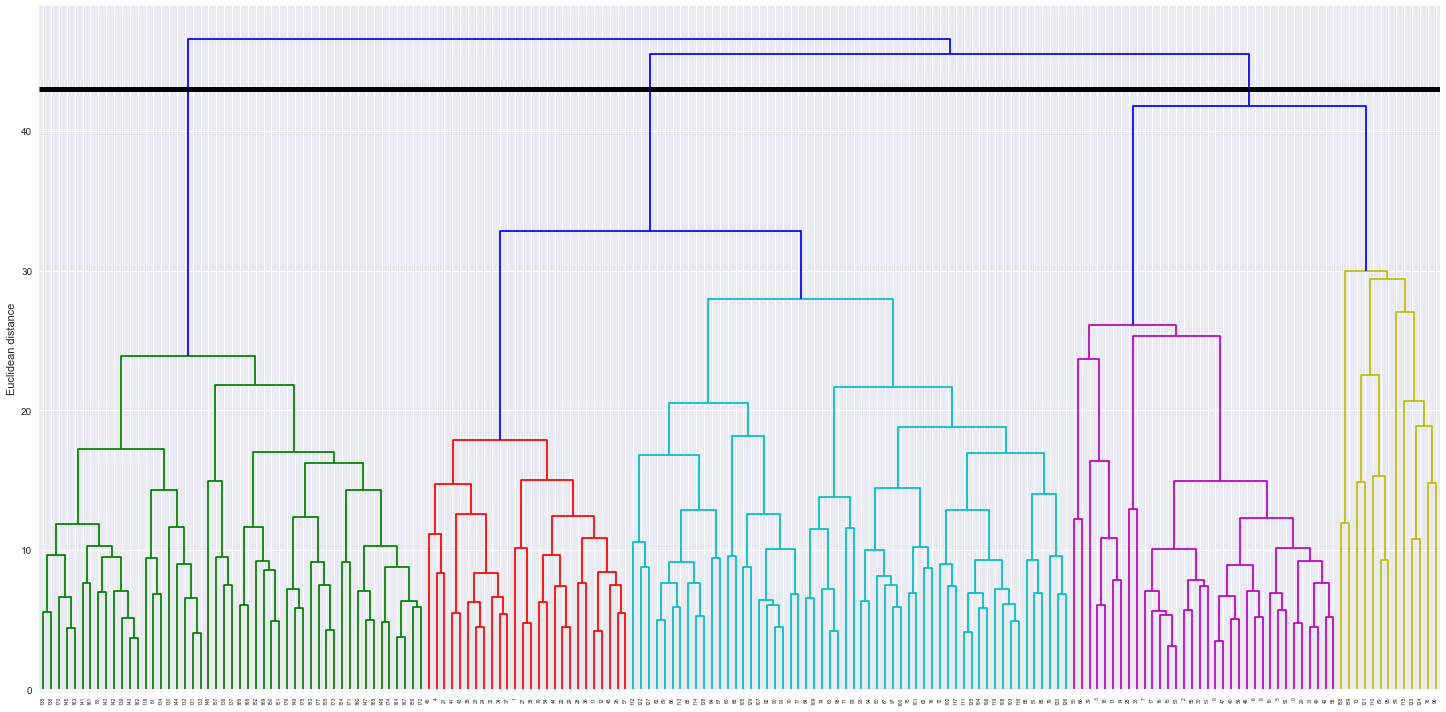

In [10]:
from scipy.cluster.hierarchy import dendrogram

fig = plt.figure(figsize=(20,10))
row_dendr = dendrogram(row_clusters)
plt.tight_layout()
plt.ylabel('Euclidean distance')

plt.hlines(y=43, xmin=0, xmax=2000, lw=5) # <- this line represents where we cut

plt.show()

### Number of clusters choice

looking at dendogram we opt for 3 clusters as the aggregation that identifies 3 clusters displays higher distance between clusters than other aggregations.
To further evaluate the choice, we take into consideration:
1. Number of cases per group: as calculated below, cluster 1, 2 and 3 have respectively 61, 50 and 67 observations. We conclude that the distribution of observations is fairly homogeneous among clusters.
2. Analysis of variance: here we would ideally want a low within clusters variation and a high between clusters variation. As calculated below, the standard deviation within clusters per variable is in most cases lower than 1. The standard deviation between clusters on the other hand is always equal to 1. It is therefore fair to say that the analysis of variance yields positive results.

Please look at the printed output in the following cell to see the number of observations and the standard deviation of each variable in the three cluster.

### K-Means 

In [11]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, # <- decided according to dendogram
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(new_x) # <- x is already standardized from before

for i in range(3):
    print('Cluster', str(i+1))
    print('Standard deviations variables in cluster {}: {}'.format(str(i+1), np.std(x[y_km==i,:], axis=0))) #all standard deviations are below 1 (low variance intra-cluster because we standardized and so overall the standard deviation is 1)
    print()
    print('Number of observations:', x[y_km==i].shape[0])
    print()
    print('-'*100)
print('Standard deviation between clusters {}'.format(np.std(x, axis=0)))


Cluster 1
Standard deviations variables in cluster 1: [ 0.68381879  0.60374875  0.88000893  0.99086478  0.91912414  0.53888618
  0.4795781   0.58714191  0.75806815  0.55120169  0.52136315  0.50650807
  0.74036694]

Number of observations: 61

----------------------------------------------------------------------------------------------------
Cluster 2
Standard deviations variables in cluster 2: [ 0.63870725  0.94918935  0.69724744  0.69754724  0.77740596  0.55470339
  0.31395277  0.98726508  0.70857679  1.01047946  0.49636218  0.38761343
  0.37667495]

Number of observations: 50

----------------------------------------------------------------------------------------------------
Cluster 3
Standard deviations variables in cluster 3: [ 0.65751122  0.89101802  1.07450126  0.90906907  0.94187907  0.83218871
  0.60698347  0.9741987   1.00106083  0.36682581  0.86926364  0.66547075
  0.48660118]

Number of observations: 67

---------------------------------------------------------------------

### Silhouette 

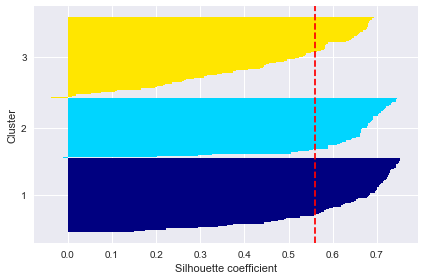

In [12]:
from matplotlib import cm 
from sklearn.metrics import silhouette_samples 


cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(new_x, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters) 
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1) 
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

### Silhouette Analysis

Above is shown the silhouette in the case of three clusters. 
The silhoutte analysis gives us an indication of how close each object of a cluster is to those of the neighboring cluster. Silhouette coefficients displayed on the horizontal axis range from -1 to +1 where a value of 1 indicates that the sample object is far away from the neighboring cluster. Therefore higher values indicate higher separation, that is higher quality of the clusters obtained through our k-means algorithm.

As we can see from the graphical representation, all the plots are more or less of similar thickness and therefore of similar sizes. This is positive as ideally we would want all our clusters of the same size.

The red dotted line indicates that our cluster separation has a mean score just below 0.6. As explained above, we would ideally want a mean value of cluster separation equal to 1.

What we also notice form the graph is that cluster number 3 has a big range of values that have a silhoutte coefficient lower than the average indicating that some objects assigned to cluster 3 are closer to the decision boundary between two neighboring clusters. In other words, cluster 3 is of lower quality than cluster number 1 and 2.

### Cluster Plot

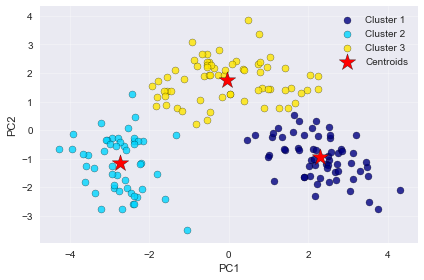

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

In [13]:
for i in range(n_clusters):
    plt.scatter(new_x[y_km==i, 0], new_x[y_km==i, 1],
               color=cm.jet(float(i) / n_clusters),
               marker='o', edgecolor='k', alpha=0.8,
               label='Cluster '+str(i + 1))
    
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
           marker='*', color='r', s=300,
           edgecolor='k', label='Centroids')

plt.ylabel('PC2')
plt.xlabel('PC1')
plt.legend(scatterpoints=1)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
pca.components_

### Which original variables are more important

Cluster 1


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,13.686721,2.006066,2.472295,17.495082,108.131148,2.854918,3.009180,0.292295,1.931148,5.482295,1.063607,3.171148,1101.540984
std,0.558175,0.678160,0.242744,3.327132,13.199085,0.339105,0.481648,0.073471,0.436257,1.284823,0.119820,0.361580,234.420674
min,11.560000,1.350000,2.040000,11.200000,89.000000,2.200000,2.190000,0.170000,1.250000,2.600000,0.820000,2.510000,465.000000
25%,13.300000,1.670000,2.300000,16.000000,100.000000,2.600000,2.680000,0.250000,1.660000,4.500000,0.980000,2.870000,970.000000
50%,13.740000,1.770000,2.450000,17.000000,106.000000,2.850000,2.980000,0.290000,1.920000,5.400000,1.070000,3.170000,1080.000000
75%,14.100000,1.950000,2.620000,18.900000,116.000000,3.000000,3.250000,0.320000,2.100000,6.200000,1.130000,3.450000,1280.000000
max,14.830000,4.040000,3.230000,30.000000,162.000000,3.880000,5.080000,0.500000,3.280000,8.900000,1.310000,4.000000,1680.000000


----------------------------------------------------------------------------------------------------
Cluster 2


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,13.14400,3.346200,2.425600,21.330000,98.640000,1.6772,0.807000,0.450400,1.156400,7.264400,0.686200,1.698800,622.440000
std,0.52231,1.068136,0.192684,2.346535,11.184464,0.3497,0.315887,0.123767,0.408525,2.359707,0.114284,0.277214,119.484976
min,12.20000,1.240000,1.980000,16.000000,80.000000,0.9800,0.340000,0.170000,0.550000,3.400000,0.480000,1.270000,372.000000
25%,12.79500,2.610000,2.300000,20.000000,89.000000,1.4275,0.580000,0.400000,0.845000,5.310000,0.590000,1.520000,522.500000
50%,13.13500,3.285000,2.380000,21.000000,96.500000,1.6400,0.695000,0.470000,1.105000,7.400000,0.670000,1.680000,622.500000
75%,13.49750,3.907500,2.595000,22.875000,106.000000,1.8000,0.950000,0.530000,1.350000,9.152500,0.757500,1.827500,692.500000
max,14.34000,5.650000,2.860000,27.000000,123.000000,2.8000,1.590000,0.630000,2.700000,13.000000,0.960000,2.470000,880.000000


----------------------------------------------------------------------------------------------------
Cluster 3


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,12.268955,1.883433,2.226119,19.946269,92.925373,2.246567,2.049254,0.359104,1.605373,3.025373,1.063224,2.783582,516.880597
std,0.536301,1.000089,0.296172,3.050203,13.515775,0.523281,0.609148,0.121814,0.575666,0.854415,0.199625,0.474705,153.956558
min,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.570000,0.130000,0.410000,1.280000,0.690000,1.590000,278.000000
25%,11.915000,1.230000,2.000000,18.000000,86.000000,1.910000,1.625000,0.270000,1.350000,2.500000,0.930000,2.450000,406.500000
50%,12.290000,1.610000,2.240000,20.000000,88.000000,2.200000,2.030000,0.350000,1.560000,2.900000,1.040000,2.830000,495.000000
75%,12.470000,2.125000,2.410000,21.550000,98.000000,2.555000,2.475000,0.430000,1.870000,3.390000,1.205000,3.150000,625.000000
max,13.860000,5.800000,2.920000,28.500000,151.000000,3.520000,3.750000,0.660000,3.580000,5.750000,1.710000,3.640000,1020.000000


----------------------------------------------------------------------------------------------------


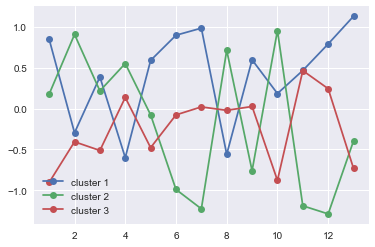

In [14]:
print('Cluster 1')
display(df.iloc[y_km==0].describe()) #cluster 1 
print('-'*100)
print('Cluster 2')
display(df.iloc[y_km==1].describe()) #cluster 2
print('-'*100)
print('Cluster 3')
display(df.iloc[y_km==2].describe())   #cluster 3
print('-'*100)

plt.plot(range(1,14), x[y_km==0,:].mean(axis=0), label='cluster 1',marker='o')
plt.plot(range(1,14), x[y_km==1,:].mean(axis=0), label='cluster 2',marker='o')
plt.plot(range(1,14), x[y_km==2,:].mean(axis=0), label='cluster 3',marker='o')
plt.legend();

First, we added a table for each cluster with a few summary statistics about the distribution of the 13 variables.
To see which variables are most important for each cluster we compare the mean of each variable among the clusters (taking also into account the standard deviation, i.e. a variable is important if its mean differs from those of the other two variables of at least two standard deviations). In the case the mean of a cluster is significantly different from those of the other two, then we can say that that variable is important for that cluster. In order to spot more easily the important variables we added a plot showing the mean of each variable for every cluster. Please note that we plotted the means of the standardized variables so as to be able to have them all in one graph within a narrow range. 

By looking at the previous graph, we can see the differences in means for each cluster:
* Cluster 1: for the first cluster we see that the most important variables are the number 13 (Proline), 7 (Flavanoids) and 6 (Total_Phenols). We can see from the graph that there is a lot of distance between the mean of these variables for cluster 1 and the other clusters.
* Cluster 2: for this cluster we have three variables which can be considered as most important. They are variable 7 (Flavanoids), 6 (Total_Phenols), and 12 (OD280). The distance between the mean of these variables for cluster 2 is very different from the mean of these variables in the other two clusters.
* Cluster 3: in this case only variable 1 (Alcohol) and variable 7 (Flavanoids) can be considered as important.  

### Interpretation of each cluster

By looking at the graph that plots the standardized mean values of the 'original' variables for each cluster and by looking at the cluster plot, we can give an interpretation to each of our three clusters.

What we notice first is that, if we take into consideration only the PC2, cluster 1 and cluster 2 are similar both in terms of centroids and in terms of the distribution of observations around the centroids. Cluster 3, on the other hand, is the only cluster that has centroid with positive value with regard to PC2. 
Second, we see that all the three clusters differ when taking into consideration PC1: the second cluster has negative values for all the observations, the first cluster has only positive values and the third cluster is in the middle, with the centroid being close to zero.

The comments made by observing the graph that plots the standardized mean values of the 'original' variables for each cluster lead unsurprisingly to similar conclusions regarding the distinctive characteristics of each cluster.

Considering the above mentioned, we can coclude that:
first, cluster 1 and cluster 2 are made up of wines that have a  higher alcohol level and color intensity. Therefore these two clusters likely include red wines. Cluster 3 on the other hand likely includes white wines and in general lighter wines.
second, cluster 2 is comprised of red wines with lower organoleptic properties (where by organoleptic properties we mostly consider presence of Flavanoids, Total phenols and OD280) relative to those of clusters 3 and 1. Cluster 3 is comprised of those white and lighter wines with organoleptic properties in between those of clusters 1 and 2. Finally, strong red wines with high organoleptic properties will be part of cluster 1.

### Function 1

/Users/davidemartinelli/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/davidemartinelli/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


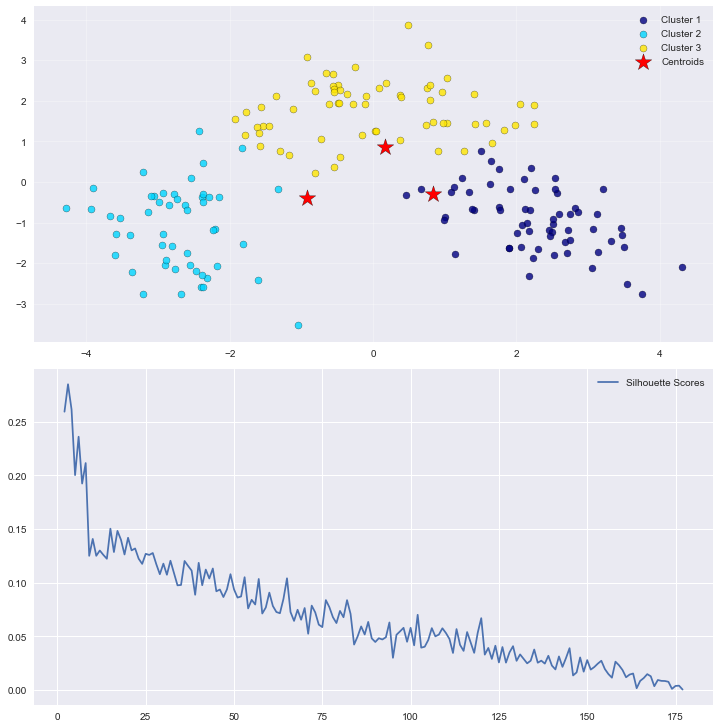

3

In [15]:
from sklearn.metrics import silhouette_score

def best_k_sil(df):
    silhouette_scores = []
    n = df.shape[0]
    x = StandardScaler().fit_transform(df)
    
    for i in range(2,n):
        km = KMeans(n_clusters=i,
                   init='random', 
                   n_init=10,
                   max_iter=300,
                   tol=1e-04)
        y_km = km.fit_predict(x)
        score = silhouette_score(x, y_km)
        silhouette_scores.append(score)
        
    best_k = silhouette_scores.index(np.max(silhouette_scores)) + 2
    
    pca = PCA(n_components=2)
    new_x = pca.fit_transform(x)
    
    km = KMeans(n_clusters=best_k,
                   init='random', 
                   n_init=10,
                   max_iter=300,
                   tol=1e-04)
    
    y_km = km.fit_predict(x)
    n_clusters = np.unique(y_km)
    fig = plt.figure(figsize=(10,10))
    
    for i in n_clusters:
        plt.subplot(2,1,1)
        plt.scatter(new_x[y_km==i, 0], new_x[y_km==i, 1],
               color=cm.jet(float(i) / n_clusters.shape[0]),
               marker='o', edgecolor='k', alpha=0.8,
               label='Cluster '+str(i + 1))
    
    plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
           marker='*', color='r', s=300,
           edgecolor='k', label='Centroids')

    plt.legend(scatterpoints=1)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    
    plt.subplot(2,1,2) # We add this graph because we think it might be useful
    plt.plot(range(2,n), silhouette_scores, label='Silhouette Scores')
    plt.legend()
    
    plt.show()
    
    return best_k
    
    
best_k_sil(df)
    
        

### Function 2

In [16]:
def circle_plot(pc1, pc2, n_pc1, n_pc2):
    PCs = np.vstack([pc1, pc2])

    plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]), 
               PCs[0,:], PCs[1,:], 
               angles='xy', scale_units='xy', scale=1, alpha=0.8)

    feature_names = np.arange(PCs.shape[1]) + 1 # here we added '+1' so that first component is number 1 (and not 0)
    for i,j,z in zip(PCs[1,:]+0.02, PCs[0,:]+0.02, feature_names): 
        plt.text(j, i, z, ha='center', va='center', size=12) 

    circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b') 
    plt.gca().add_artist(circle) 

    plt.axis('equal')
    plt.xlim([-1.0,1.0])
    plt.ylim([-1.0,1.0])

    plt.xlabel('PC' + str(n_pc1+1))
    plt.ylabel('PC' + str(n_pc2+1))

    #plt.show()


def pca_circle_corr(df, same_plot=True, save=False):
    x = StandardScaler().fit_transform(df)
    pca = PCA()
    pca.fit_transform(x)
    n = x.shape[1]
    
    PCs = pca.components_
    
    if same_plot: # in this case, we plot all of the 13*12 cirle plots in one graph
        position = 1
        fig = plt.figure(figsize=(50,50))
        
        for i in range(n):
            for j in range(n):
                if i != j:
                    plt.subplot(n,n-1, position)
                    plt.subplots_adjust(hspace=0.4, wspace=0.5)
                    circle_plot(PCs[i,:], PCs[j,:], i, j)
                    position += 1
        
        if save:
            plt.savefig('fig1.png')
            
    else: #otherwise, we plot circle plots in 3 by 3 graphs
        positions = np.array([i for i in range(1,10)]*13*12)
        position_index = 0
        fig = plt.figure(figsize=(10,10))
        for i in range(n):
            for j in range(n):
                if i != j:
                    if position_index!=0 and position_index % 9 == 0:
                        if save:
                            name_fig = 'fig' + str(position_index // 9) + '.png' #save each 3x3 graph
                            plt.savefig(name_fig)
                        plt.figure(figsize=(10,10))
                    plt.subplot(3, 3, positions[position_index])
                    plt.subplots_adjust(wspace=0.5, hspace=0.4)
                    circle_plot(PCs[i,:], PCs[j,:], i, j)
                    position_index += 1
        if save and (position_index-1) % 9 !=0: #this part runs only if the number of circle plots (13*12 in this case) is not divisible by 9 (3x3)
            name_fig = 'fig' + str(position_index // 9 + 1) + '.png'
            plt.savefig(name_fig)

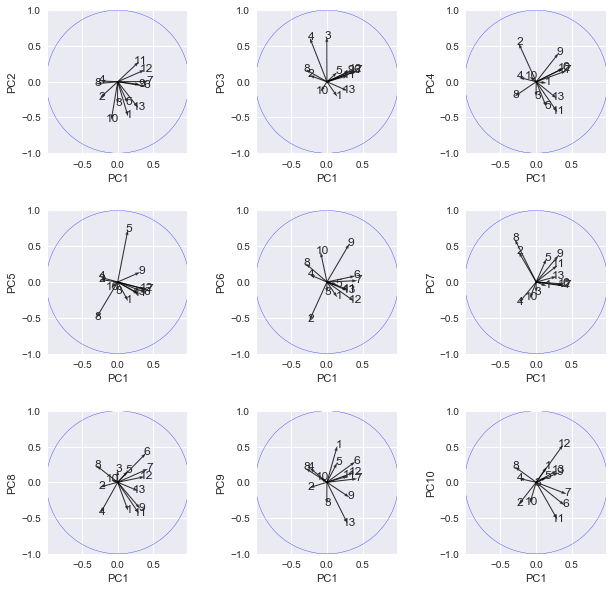

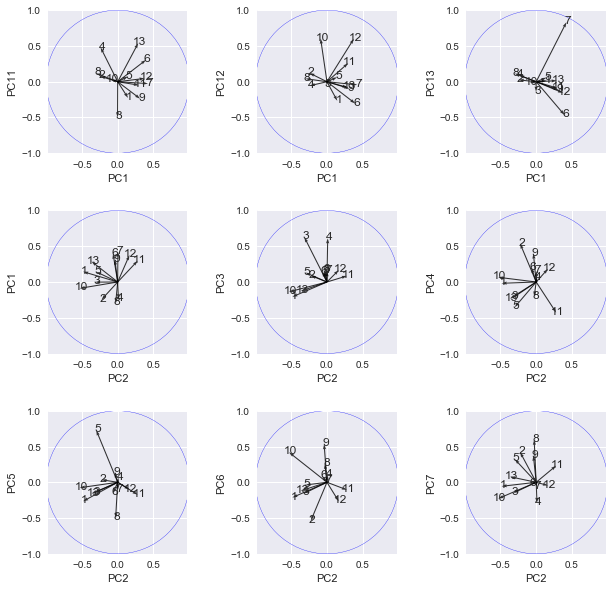

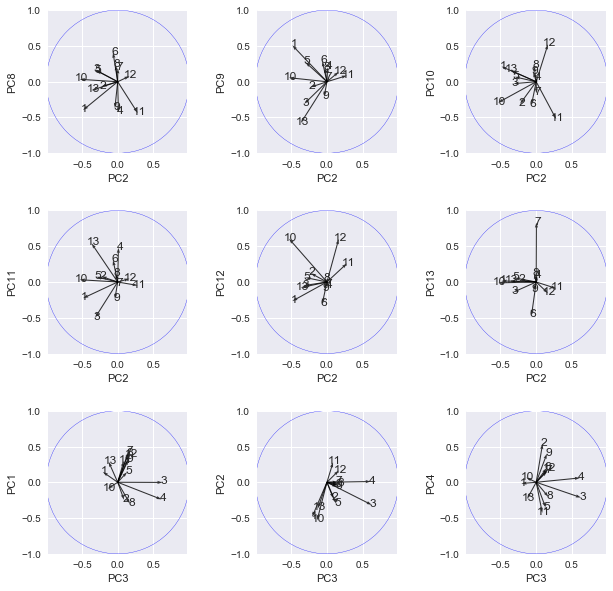

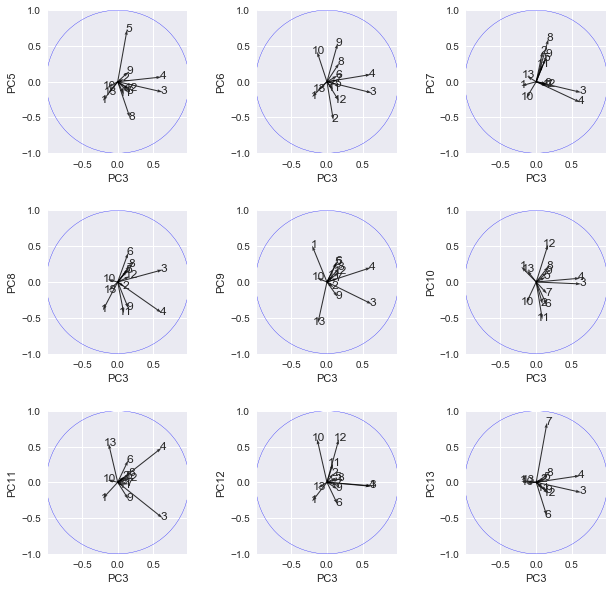

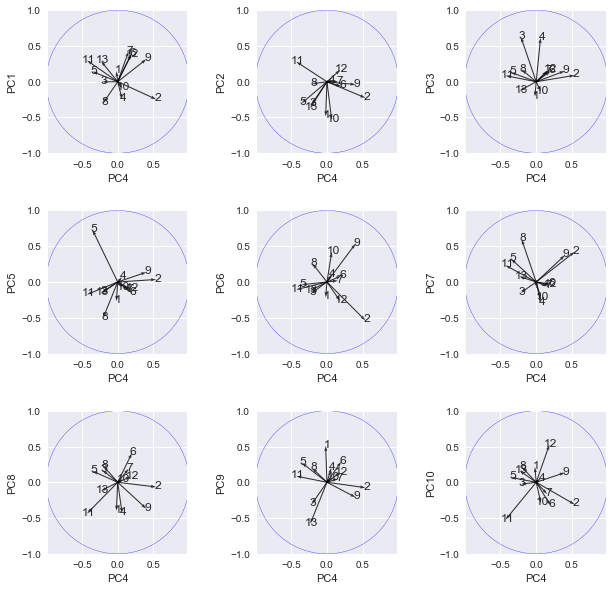

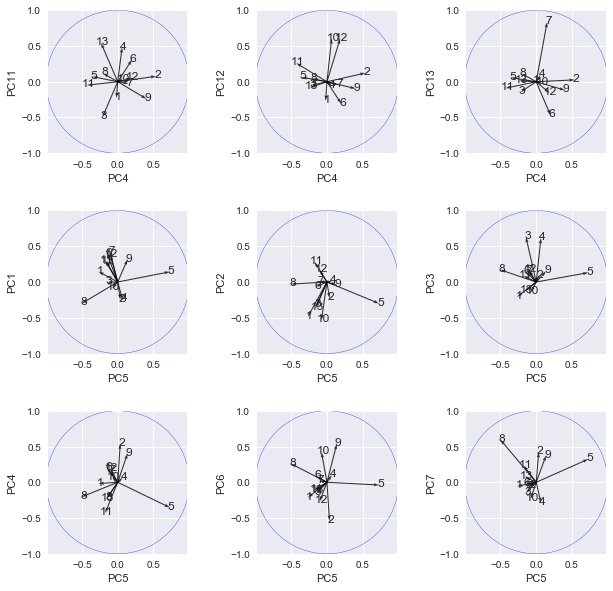

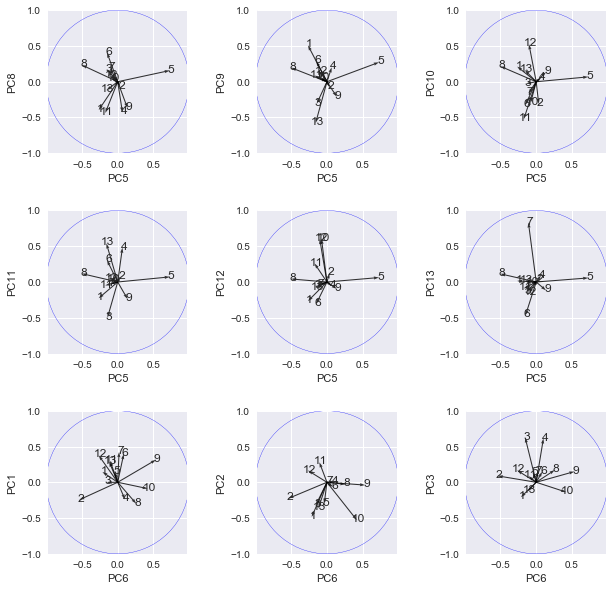

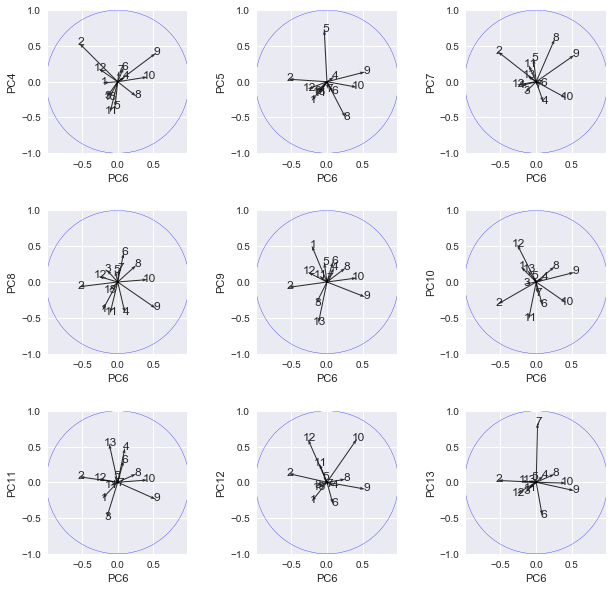

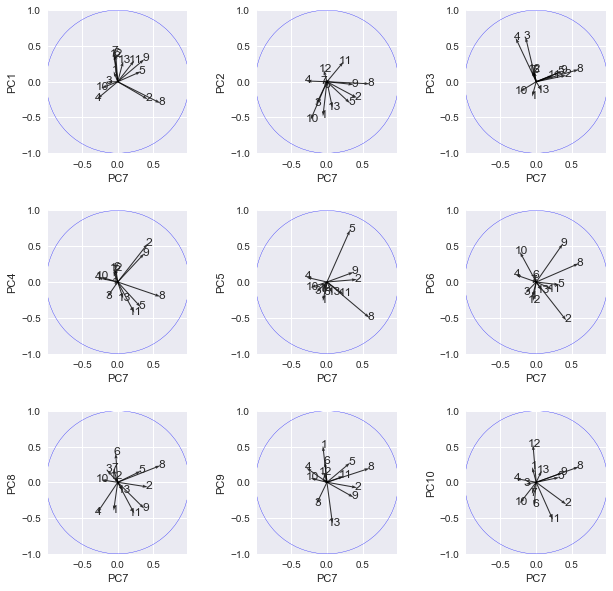

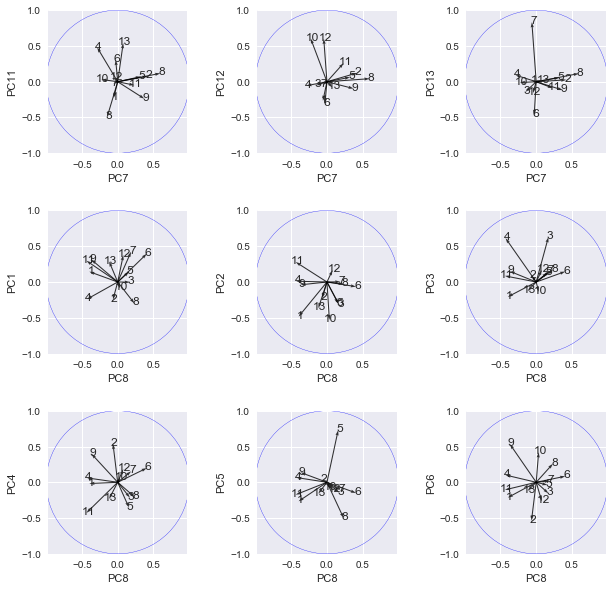

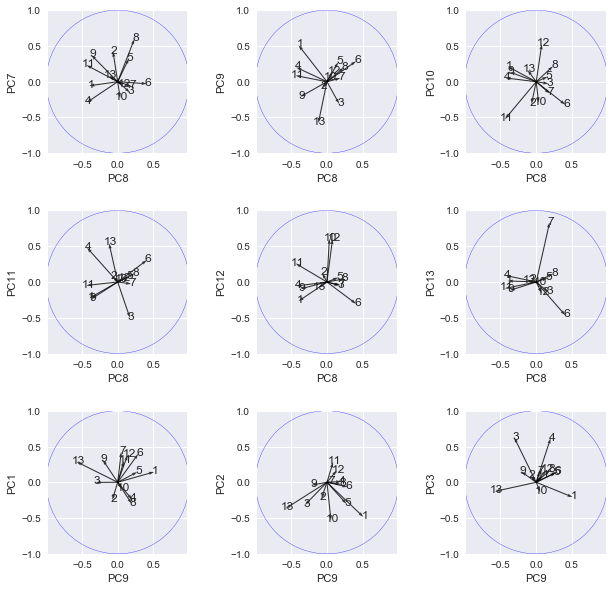

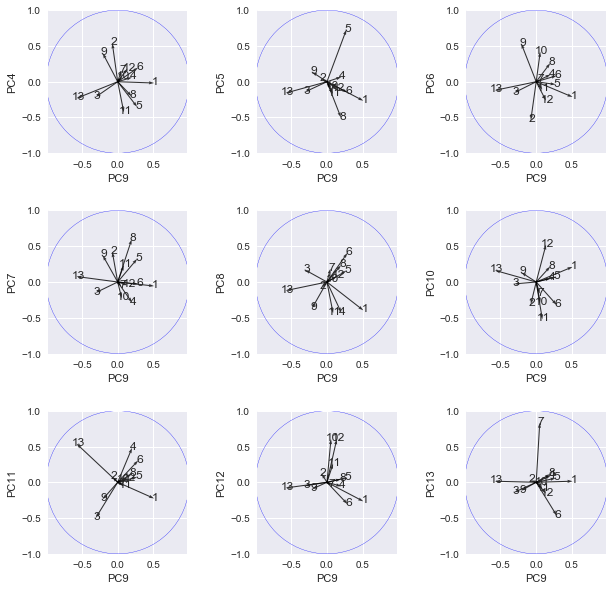

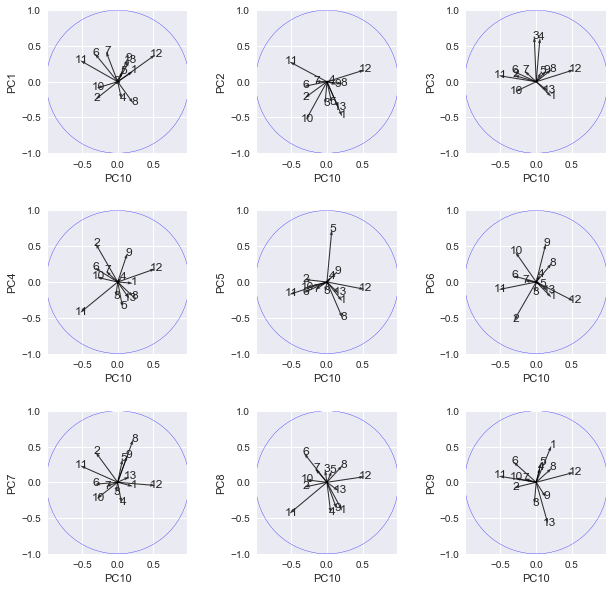

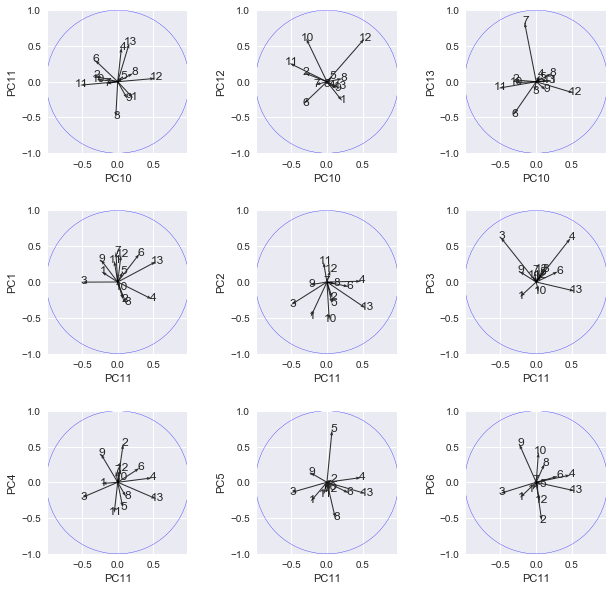

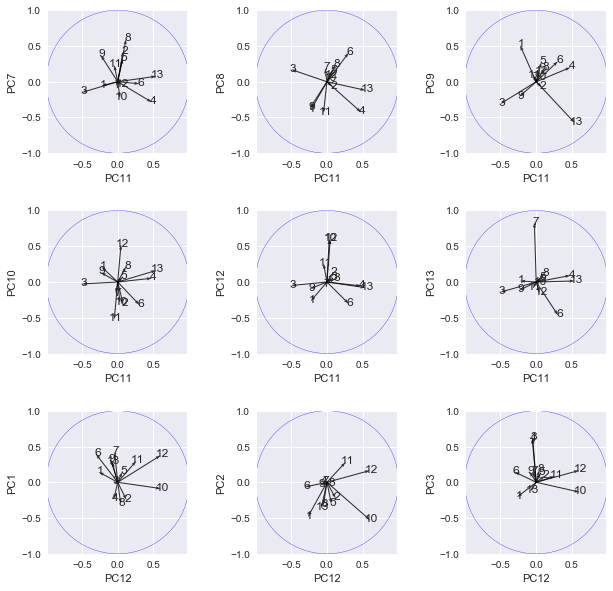

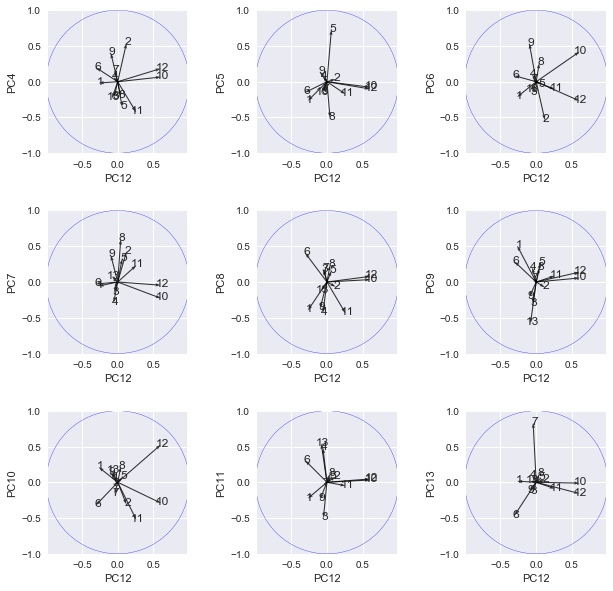

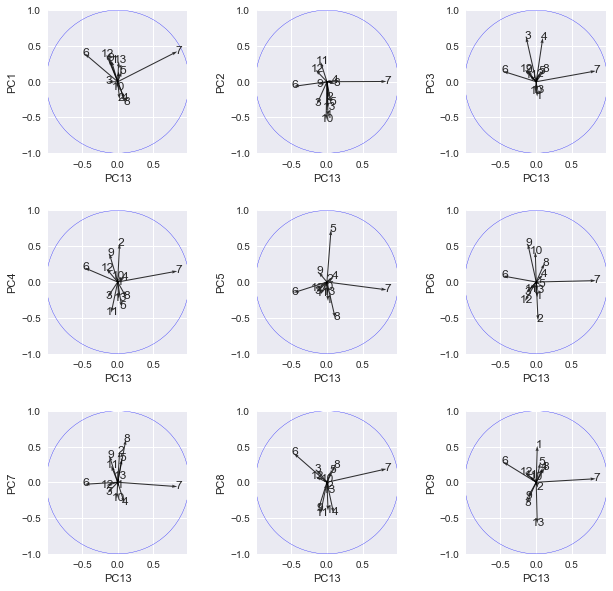

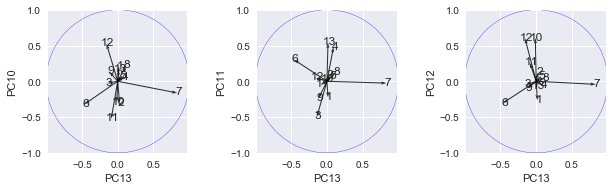

In [17]:
pca_circle_corr(df,same_plot=False, save=False)

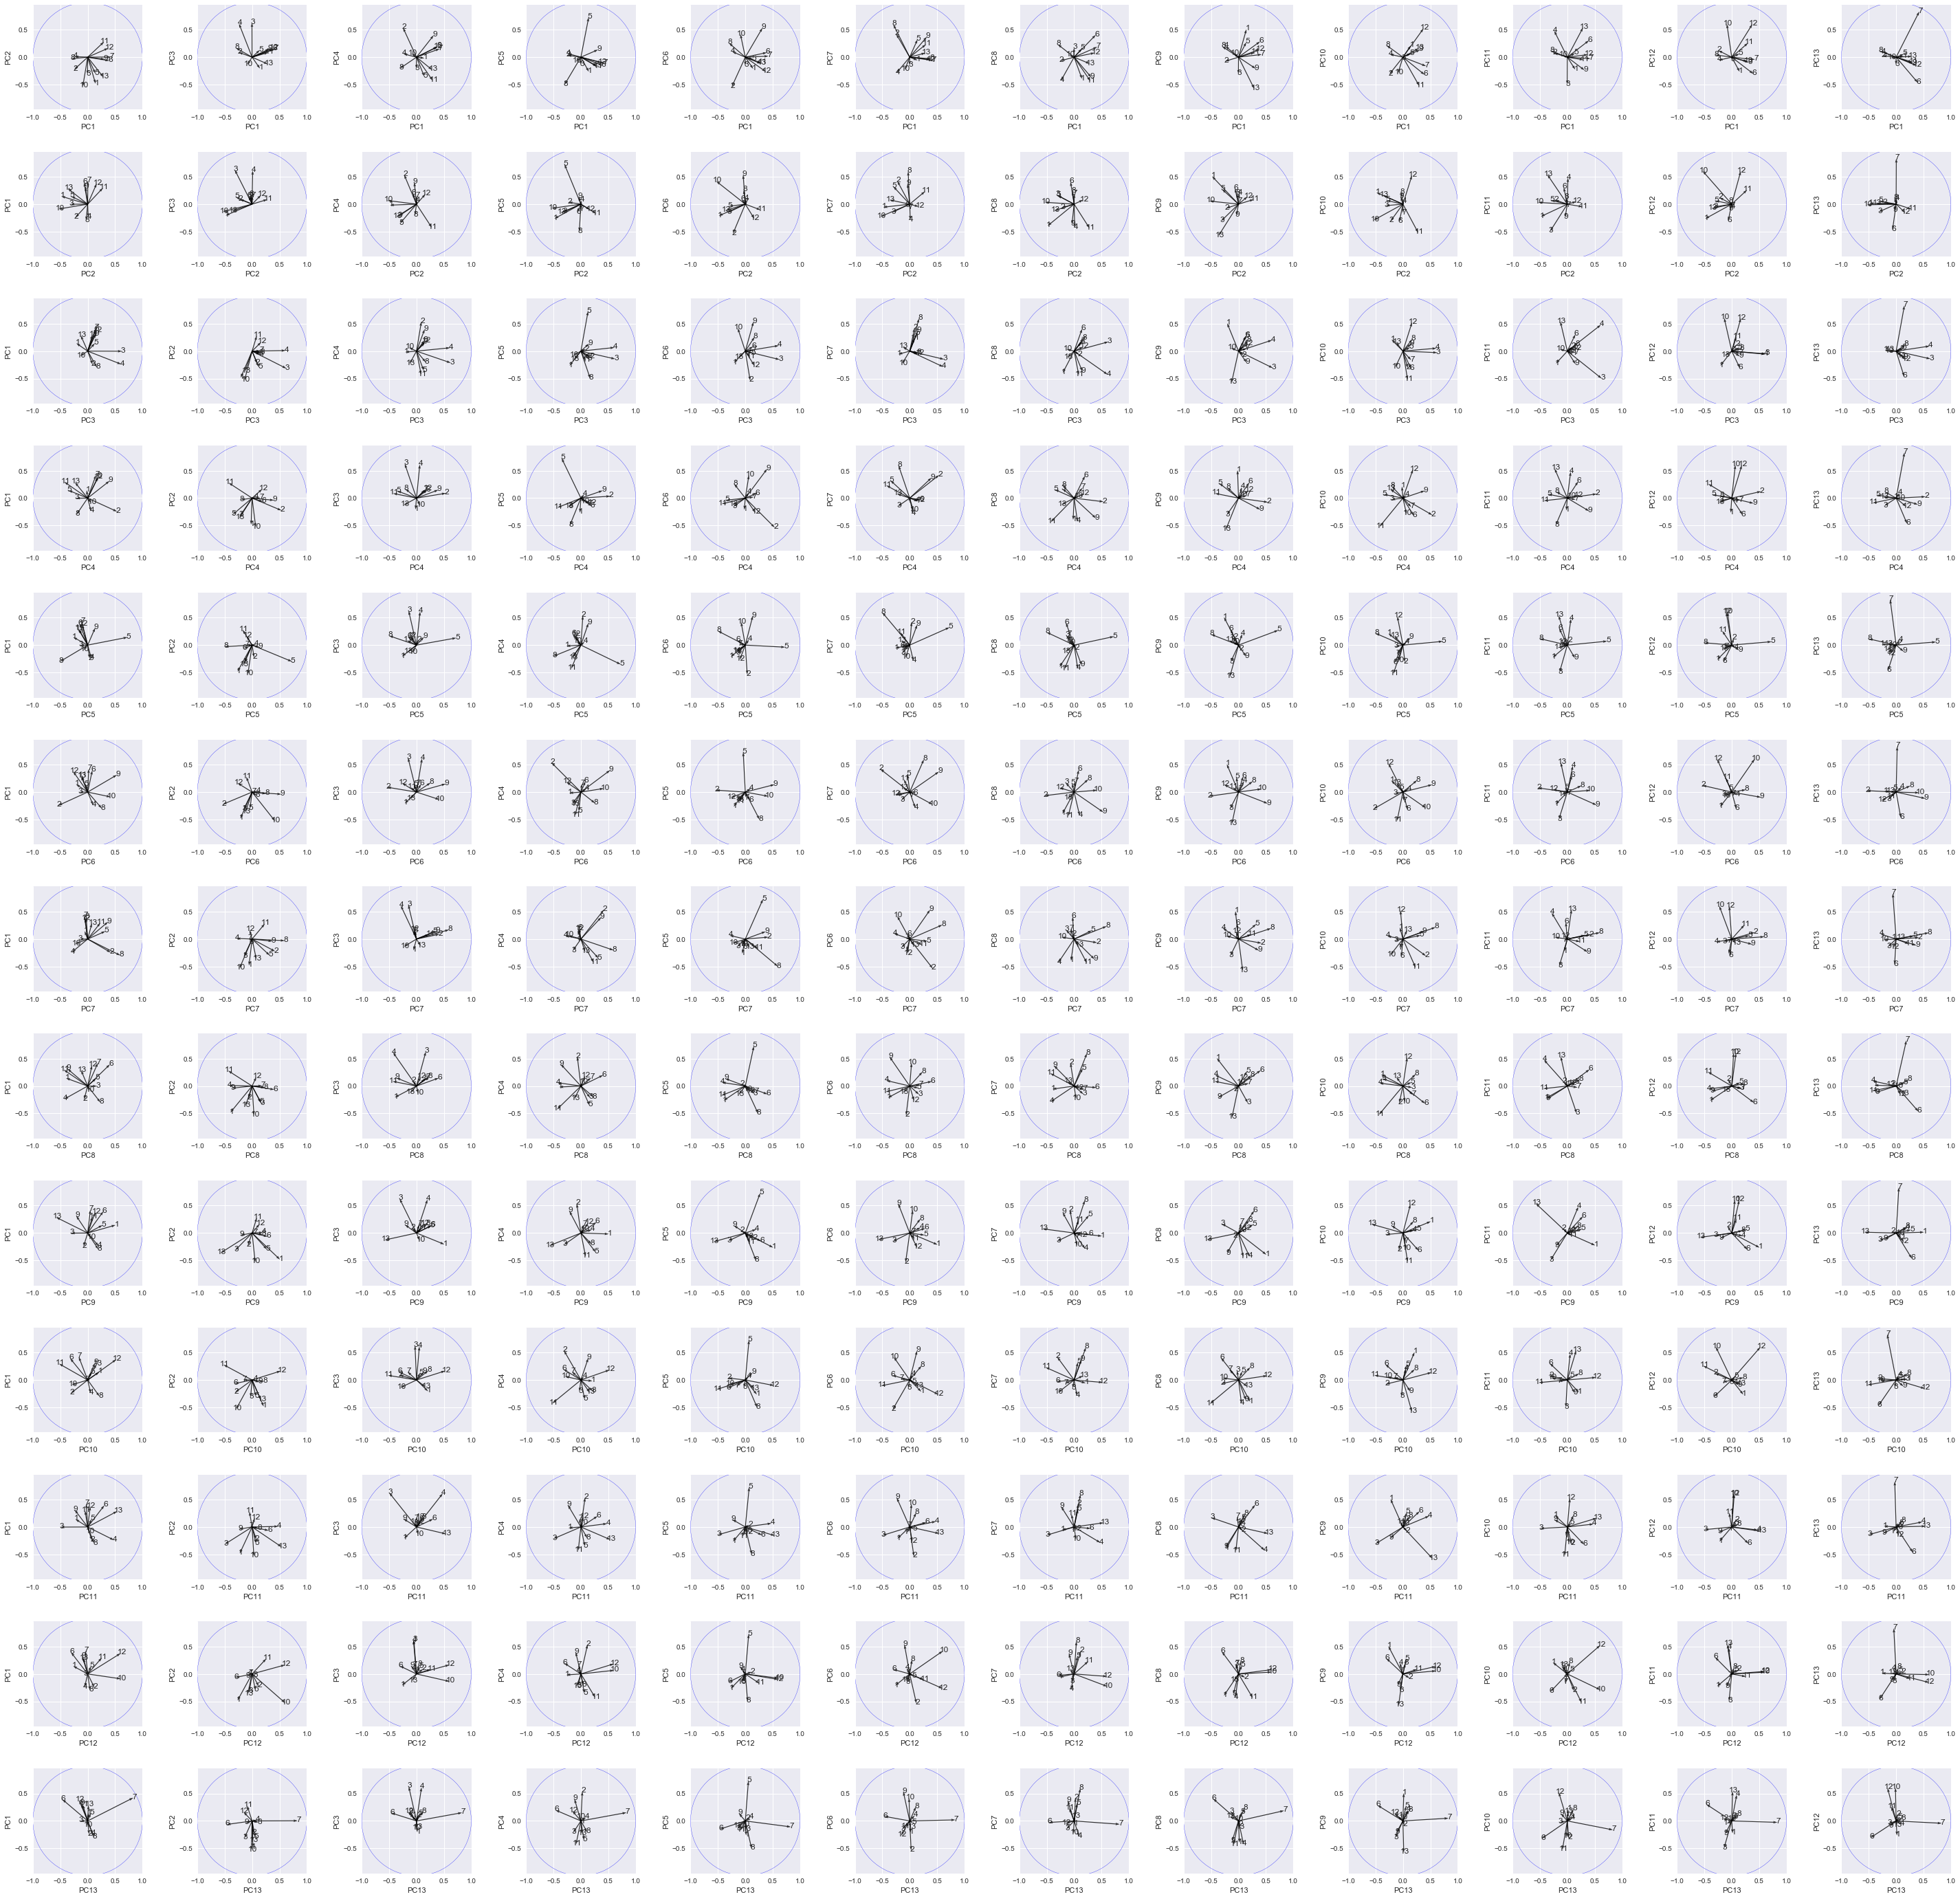

In [18]:
pca_circle_corr(df, same_plot=True, save=False)